In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv('D:\\Downloads\\nba-all-star-game-20002016\\NBA All Stars 2000-2016 - Sheet1.csv')

After taking a look at the dataset we can see that, we need to clean the data a bit to predict more about the patterns in dataset

In [48]:
df.head()

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States
1,2016,James Harden,SG,6-5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States
3,2016,Kawhi Leonard,F,6-7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States
4,2016,Anthony Davis,PF,6-11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States


In [49]:
df.describe()

,Year,WT
count,439.000000,439.000000
mean,2007.974943,228.751708
std,4.899148,30.834435
min,2000.000000,165.000000
25%,2004.000000,210.000000
50%,2008.000000,235.000000
75%,2012.000000,246.000000
max,2016.000000,325.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 9 columns):
Year                439 non-null int64
Player              439 non-null object
Pos                 439 non-null object
HT                  439 non-null object
WT                  439 non-null int64
Team                439 non-null object
Selection Type      439 non-null object
NBA Draft Status    439 non-null object
Nationality         439 non-null object
dtypes: int64(2), object(7)
memory usage: 31.0+ KB


The 'Selection Type' coloumn could be further split into 'Conference' and 'Selection' coloumns to get to know which conferencet does the player belong to along with the selection type 

In [51]:
split_data = df["Selection Type"].str.split("All-Star ",expand = True)


In [52]:
split_data
df['Conference'] = split_data[0]
df['Selection'] = split_data[1]

In [53]:
df
df = df.drop(['Selection Type'],axis = 1)


The graph below suggest the number of players selected from Fan's vote, Coaches Vote and Replacement Selection

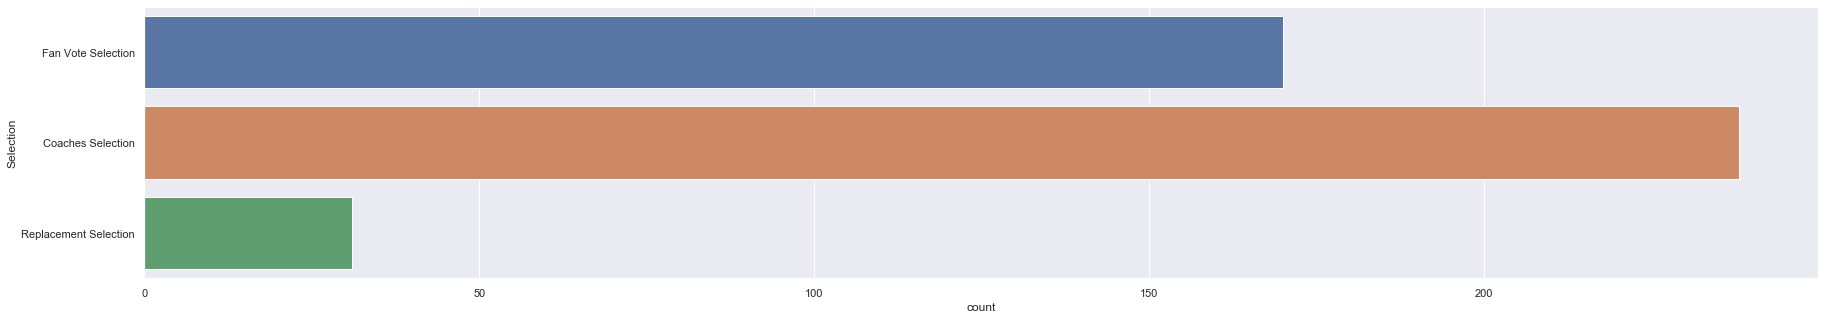

In [54]:
sns.countplot(y = 'Selection',data = df)

We further split 'NBA Draft Status' coloumn into three different coloumns i.e. 'Draft Year','Rnd','Pick No.'

In [55]:
d_stat = df['NBA Draft Status'].str.split(' ',expand = True)

In [56]:
d_stat
df['Draft Year'] = d_stat[0]
df['Rnd'] = d_stat[2]
df['Pick No.'] = d_stat[4]
df = df.drop(['NBA Draft Status'],axis = 1)

The figure below helps us to know the 'Pick No.' of the people in the All - Star game for that year. 

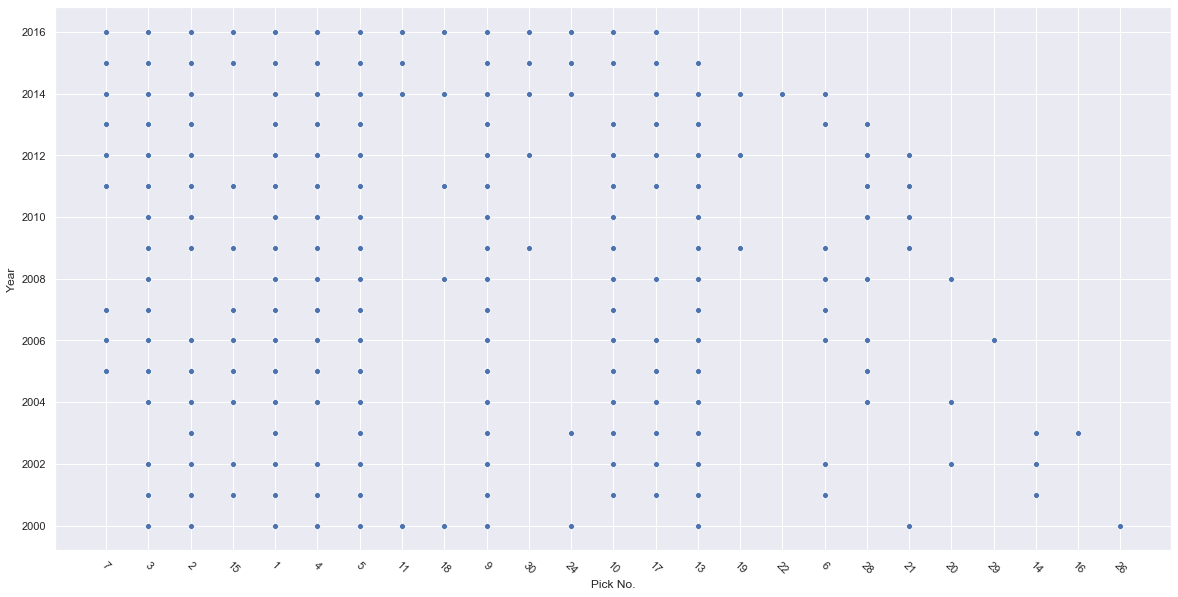

In [69]:
sns.scatterplot(x = 'Pick No.',y = 'Year',data = df)
plt.xticks(rotation=-45)
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (30, 5)

In [57]:
df['Nationality'].unique()

array(['United States', 'Spain', 'United States\nAustralia',
       'Greece\nNigeria', 'Dominican Republic\nUnited States', 'Germany',
       'France', 'France\nUnited States', 'England\nSouth Sudan',
       'Canada\nSouth Africa', 'China', 'Argentina',
       'United States\nGermany', 'Germany\nUnited States', 'Turkey',
       'Lithuania', 'Russia', 'Serbia\nGreece', 'Canada',
       'Democratic Republic of the Congo', 'United States\nSpain',
       'Serbia'], dtype=object)

In [58]:
nat_df = df['Nationality'].str.split('\n',expand = True)

In [59]:
df['Nation1'] = nat_df[0]
df['Nation2'] = nat_df[1]

In [60]:
df.drop(['Nationality'],axis = 1)

,Year,Player,Pos,HT,WT,Team,Conference,Selection,Draft Year,Rnd,Pick No.,Nation1,Nation2
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,Western,Fan Vote Selection,2009,1,7,United States,None
1,2016,James Harden,SG,6-5,220,Houston Rockets,Western,Fan Vote Selection,2009,1,3,United States,None
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,Western,Fan Vote Selection,2007,1,2,United States,None
3,2016,Kawhi Leonard,F,6-7,230,San Antonio Spurs,Western,Fan Vote Selection,2011,1,15,United States,None
4,2016,Anthony Davis,PF,6-11,253,New Orleans Pelicans,Western,Fan Vote Selection,2012,1,1,United States,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2000,Antonio McDyess,F,6-9,245,Denver Nuggets,Western,Coaches Selection,1995,1,2,United States,None
435,2000,Gary Payton,G,6-4,180,Seattle SuperSonics,Western,Coaches Selection,1990,1,2,United States,None
436,2000,Rasheed Wallace,FC,6-11,230,Portland Trail Blazers,Western,Coaches Selection,1995,1,4,United States,None
437,2000,David Robinson,C,7-1,250,San Antonio Spurs,Western,Coaches Selection,1987,1,1,United States,None


In [61]:
df['Team'].unique()

array(['Golden State Warriors', 'Houston Rockets', 'San Antonio Spurs',
       'New Orleans Pelicans', 'Oklahoma City Thunder',
       'Sacramento Kings', 'Memphis Grizzlies', 'Los Angeles Clippers',
       'Utah Jazz', 'Cleveland Cavaliers', 'Toronto Raptors',
       'Milwaukee Bucks', 'Chicago Bulls', 'Boston Celtics',
       'Washington Wizards', 'Indiana Pacers', 'Charlotte Hornets',
       'Atlanta Hawks', 'Miami Heat', 'New York Knicks',
       'Detroit Pistons', 'Los Angeles Lakers', 'Portland Trail Blazers',
       'Dallas Mavericks', 'Minnesota Timberwolves', 'Brooklyn Nets',
       'Philadelphia Sixers', 'Orlando Magic', 'New Jersey Nets',
       'Phoenix Suns', 'Denver Nuggets', 'New Orleans Hornets',
       'Charlotte Bobcats', 'Seattle SuperSonics'], dtype=object)

Removing the data for teams which are not currently a part of NBA

In [62]:
no_teams = ['Seattle SuperSonics','Charlotte Bobcats','New Orleans Hornets','New Jersey Nets']
for team in no_teams:
    df[df['Team']==team]
    k = df.loc[df['Team']==team].index.values
    df = df.drop(k,axis= 0)
    df.reset_index(drop = True)

Plotting the count plot of the number of players from each team which have played the All - Star game over the years

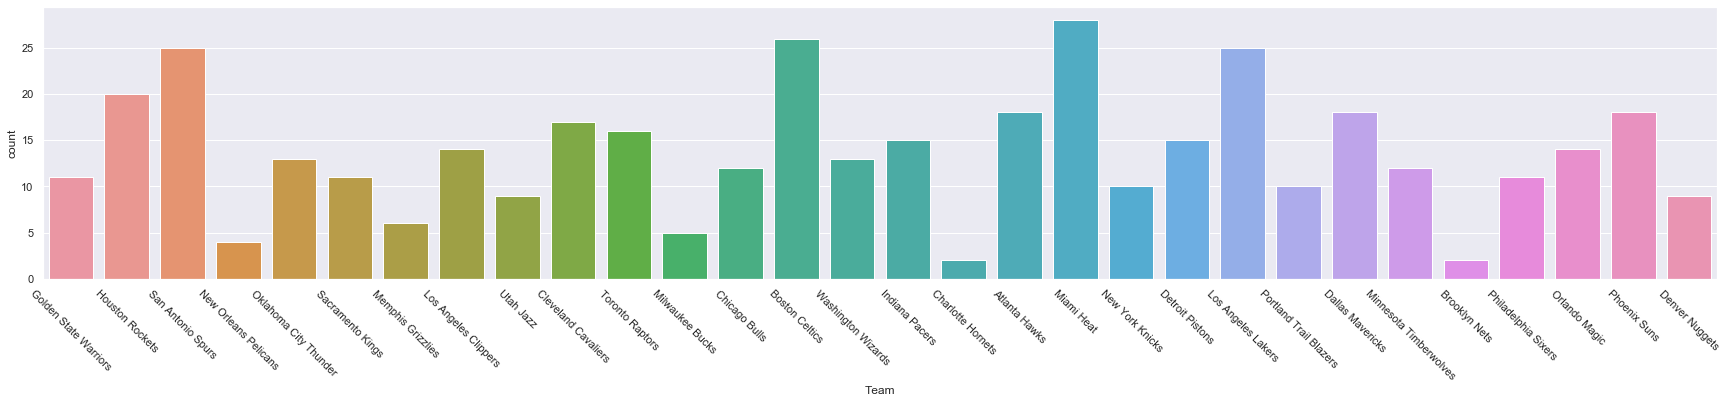

In [63]:
sns.countplot(x ='Team',data=df)
plt.xticks(rotation=-45)
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (30, 5)

Plotting the count of players from both the conferences which have played the All Star game over the years

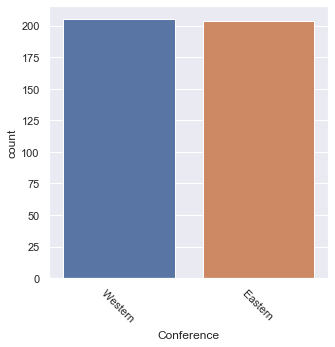

In [65]:
sns.countplot(x ='Conference',data = df)
plt.xticks(rotation = -45)
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (5, 5)

Below is the scatter plot of the teams who had their players in that particular year's All Star game

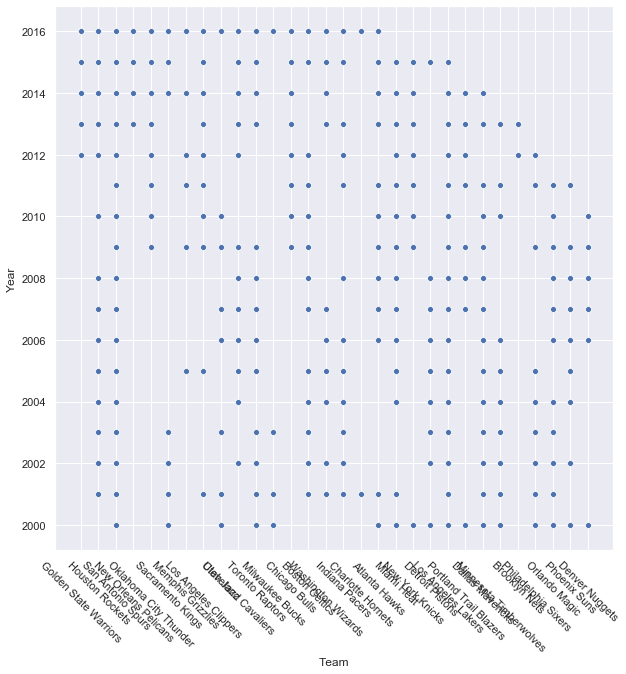

In [67]:
sns.scatterplot(x = 'Team',y = 'Year',data = df)
plt.xticks(rotation = -45)
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (20,10)

The below plot helps us to get insight into the quality of players drafted in a year ,for example,the Draft of 1996 gave NBA few of its best players, whereas the Draft of 2000 and 2013 was not as great as expected. We are deducing this taking into account the number of players drafted in an year playing the All Star game

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

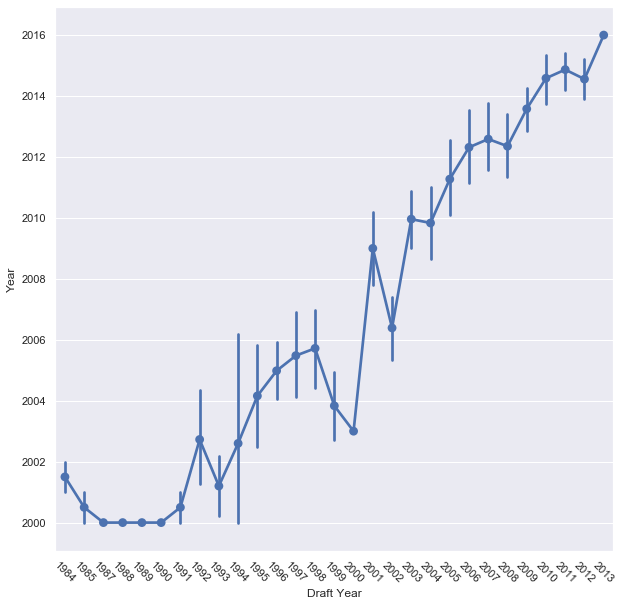

In [24]:
sns.pointplot(x = 'Draft Year',y = 'Year',data = df)
plt.xticks(rotation = -45)

In [25]:
df.head()

,Year,Player,Pos,HT,WT,Team,Nationality,Conference,Selection,Draft Year,Rnd,Pick No.,Nation1,Nation2
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,United States,Western,Fan Vote Selection,2009,1,7,United States,None
1,2016,James Harden,SG,6-5,220,Houston Rockets,United States,Western,Fan Vote Selection,2009,1,3,United States,None
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,United States,Western,Fan Vote Selection,2007,1,2,United States,None
3,2016,Kawhi Leonard,F,6-7,230,San Antonio Spurs,United States,Western,Fan Vote Selection,2011,1,15,United States,None
4,2016,Anthony Davis,PF,6-11,253,New Orleans Pelicans,United States,Western,Fan Vote Selection,2012,1,1,United States,None


In [26]:
df['Selection'].unique()

array(['Fan Vote Selection', 'Coaches Selection', 'Replacement Selection'],
      dtype=object)

In [27]:
n_sel = df['Selection'].str.split(' ',expand = True)

In [28]:
n_sel

,0,1,2
0,Fan,Vote,Selection
1,Fan,Vote,Selection
2,Fan,Vote,Selection
3,Fan,Vote,Selection
4,Fan,Vote,Selection
...,...,...,...
433,Coaches,Selection,None
434,Coaches,Selection,None
436,Coaches,Selection,None
437,Coaches,Selection,None


In [29]:
df['Selection'] = n_sel[0]

In [30]:
df['Selection']

0              Fan
1              Fan
2              Fan
3              Fan
4              Fan
          ...     
433        Coaches
434        Coaches
436        Coaches
437        Coaches
438    Replacement
Name: Selection, Length: 409, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

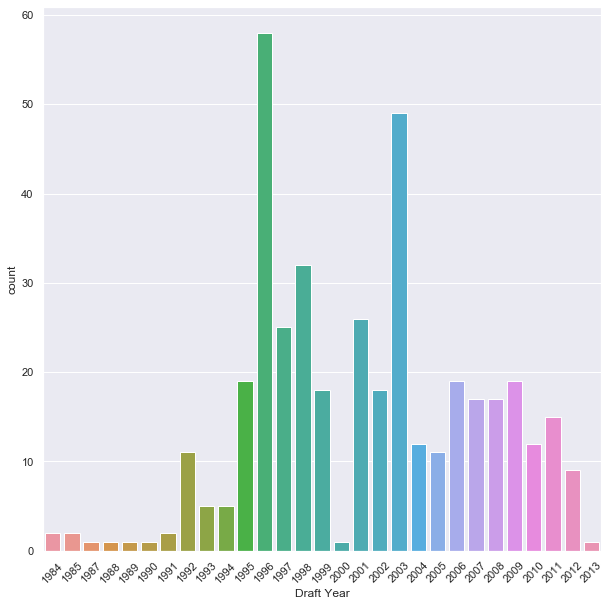

In [32]:
sns.countplot(x = 'Draft Year', data = df)
plt.xticks(rotation = 45)

What we can deduce from this graph, is that, the Draft of 1996 gave NBA few of its best players, whereas the Draft of 2000 and 2013 was not as great as expected

In [33]:
play_gsw = df[df['Team']=='Golden State Warriors']

In [68]:
play_gsw

,Year,Player,Pos,HT,WT,Team,Nationality,Conference,Selection,Draft Year,Rnd,Pick No.,Nation1,Nation2
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,United States,Western,Fan,2009,1,7,United States,None
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,United States,Western,Fan,2007,1,2,United States,None
7,2016,Klay Thompson,G,6-7,215,Golden State Warriors,United States,Western,Coaches,2011,1,11,United States,None
8,2016,Draymond Green,F,6-7,230,Golden State Warriors,United States,Western,Coaches,2012,2,5,United States,None
41,2015,Stephen Curry,G,6-3,190,Golden State Warriors,United States,Western,Fan,2009,1,7,United States,None
43,2015,Draymond Green,F,6-7,230,Golden State Warriors,United States,Western,Coaches,2012,2,5,United States,None
46,2015,Klay Thompson,G,6-7,215,Golden State Warriors,United States,Western,Coaches,2011,1,11,United States,None
63,2014,Stephen Curry,G,6-3,190,Golden State Warriors,United States,Western,Fan,2009,1,7,United States,None
69,2014,Klay Thompson,G,6-7,215,Golden State Warriors,United States,Western,Coaches,2011,1,11,United States,None
87,2013,Stephen Curry,G,6-3,190,Golden State Warriors,United States,Western,Fan,2009,1,7,United States,None


In [35]:
play_aft2006 = df['Year']>2006

In [36]:
df[play_aft2006]

,Year,Player,Pos,HT,WT,Team,Nationality,Conference,Selection,Draft Year,Rnd,Pick No.,Nation1,Nation2
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,United States,Western,Fan,2009,1,7,United States,None
1,2016,James Harden,SG,6-5,220,Houston Rockets,United States,Western,Fan,2009,1,3,United States,None
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,United States,Western,Fan,2007,1,2,United States,None
3,2016,Kawhi Leonard,F,6-7,230,San Antonio Spurs,United States,Western,Fan,2011,1,15,United States,None
4,2016,Anthony Davis,PF,6-11,253,New Orleans Pelicans,United States,Western,Fan,2012,1,1,United States,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2007,Antawn Jamison,F,6-9,235,Washington Wizards,United States,Eastern,Coaches,1998,1,4,United States,None
254,2007,Joe Johnson,SG,6-7,240,Atlanta Hawks,United States,Eastern,Coaches,2001,1,10,United States,None
255,2007,Paul Pierce,SF,6-7,235,Boston Celtics,United States,Eastern,Coaches,1998,1,10,United States,None
256,2007,Ray Allen,SG,6-5,205,Boston Celtics,United States,Eastern,Replacement,1996,1,5,United States,None


I have shown the count plot of the number of times a player has played in the All Star match

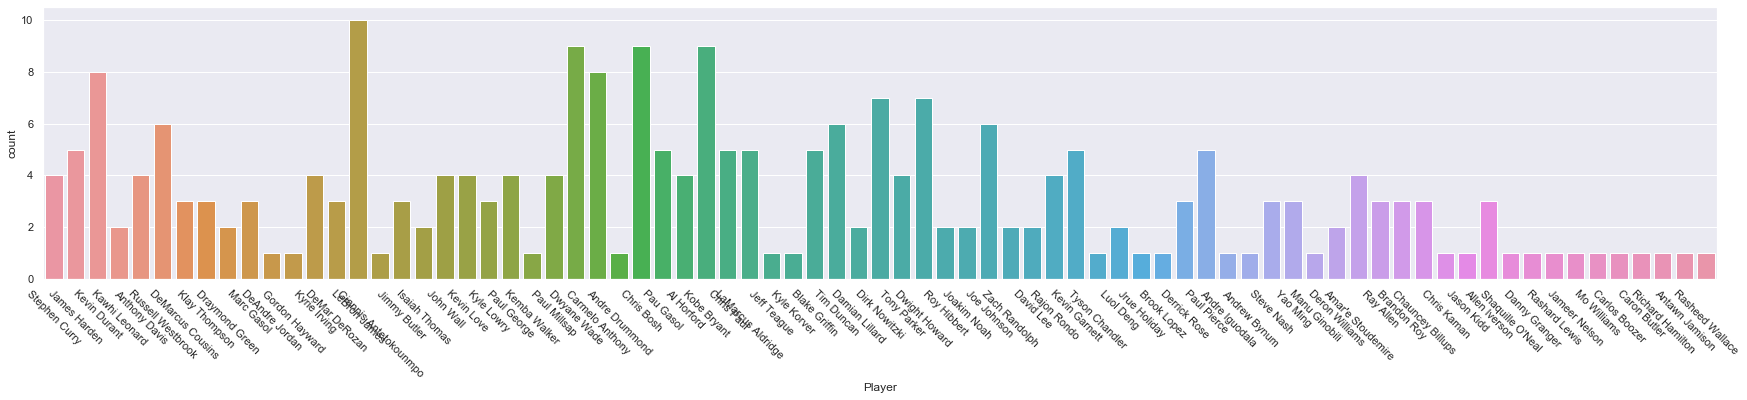

In [39]:
sns.countplot(x = 'Player',data = df[play_aft2006])
plt.xticks(rotation = -45)
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (30,5)
